In [1]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import pycountry
import re
import string
import nltk
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [2]:
consumerKey='AvwLlBSkPq7HxPEmgX9wwwUSt'
consumerSecret='Z6MQ0hcNshQRT3Az4eP8vlXFaWvAh7CVFkkrL0r1aAEQXYExxm'
accessToken ='1424002808831873030-7XrTrrnqxadPoXUJJm6lHtS0ThAmx7'
accessTokenSecret='OdfrXqqODfxtNl8rv5JxA62gP7rytooS05IOIQ4flSfQO'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [3]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)
keyword = "India covid 19 vaccines"
noOfTweet = int(input ("Please enter how many tweets to analyze: "))
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
        negative_list.append(tweet.text)
        negative = float(negative) + 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive = float(positive) + 1 
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral = float(neutral) + 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter how many tweets to analyze: 2500


In [4]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("Total number: ",len(tweet_list))
print("Positive number: ",len(positive_list))
print("Negative number: ", len(negative_list))
print("Neutral number: ",len(neutral_list))

Total number:  2007
Positive number:  657
Negative number:  433
Neutral number:  917


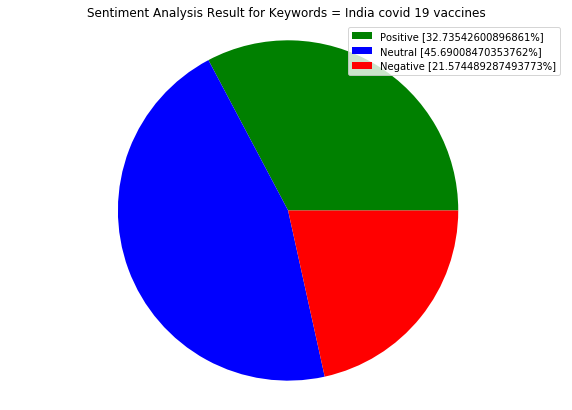

In [5]:
labels = ['Positive ['+str(len(positive_list)/len(tweet_list) * 100)+'%]' , 'Neutral ['+str(len(neutral_list)/len(tweet_list) * 100)+'%]','Negative ['+str(len(negative_list)/len(tweet_list) * 100)+'%]']
sizes = [positive, neutral, negative]
colors = ['green', 'blue','red']

fig = plt.figure(figsize =(10, 7))
plt.pie(sizes, colors=colors)

plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for Keywords = "+keyword+"" )
plt.axis('equal')
plt.show()

In [6]:
tweet_list.drop_duplicates(inplace = True)

In [7]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt)
tw_list["text"] = tw_list.text.str.lower()

In [8]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = 'negative'
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = 'positive'
    else:
        tw_list.loc[index, 'sentiment'] = 'neutral'
        tw_list.loc[index, 'neg'] = neg
        tw_list.loc[index, 'neu'] = neu
        tw_list.loc[index, 'pos'] = pos
        tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @sameepshastri: Benefits of COVID-19 vaccin...,benefits of covid-19 vaccines far outweigh ra...,0.200000,0.950000,positive,NaN,NaN,NaN,NaN
1,RT @OceanCityDental: For India’s Pharma Tycoon...,"for india’s pharma tycoons, covid-19 vaccines...",0.136364,0.454545,neutral,0.0,1.0,0.0,0.0
2,COVID-19 vaccines for children will be launche...,covid-19 vaccines for children will be launche...,0.200000,0.300000,positive,NaN,NaN,NaN,NaN
3,RT @OPPIIndia: Research from the pharmaceutica...,research from the pharmaceutical industry poi...,0.500000,0.500000,positive,NaN,NaN,NaN,NaN
4,RT @ap20148: the Covid-19 cases are larger in ...,the covid-19 cases are larger in the western ...,0.000000,0.250000,positive,NaN,NaN,NaN,NaN
5,Union Health Minister #MansukhMandaviya on Thu...,union health minister #mansukhmandaviya on thu...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
6,RT @learning4impact: As we stand on the thresh...,as we stand on the threshold of the third wav...,0.000000,0.000000,positive,NaN,NaN,NaN,NaN
7,RT @DanteAbstract: Why are nasal COVID-19 vacc...,why are nasal covid-19 vaccines so talked abo...,0.285714,0.535714,neutral,0.0,1.0,0.0,0.0
8,RT @MangusColorado: India got the Delta varian...,india got the delta variant under control? 1....,-0.166667,0.066667,neutral,0.0,1.0,0.0,0.0
9,RT @IndiaTVHindi: कोरोना की संभावित तीसरी लहर ...,कोरोना की संभावित तीसरी लहर के बीच बच्चों के ...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0


In [9]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [10]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,325,44.40
positive,242,33.06
negative,165,22.54


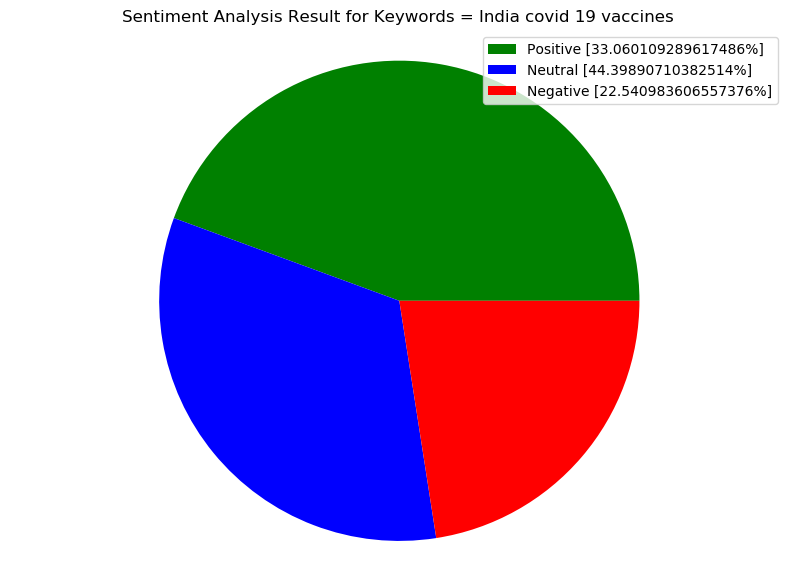

In [11]:
# Create data for Pie Chart
x = 0
y = 0
z = 0
for i in tw_list["sentiment"]:
    if(i == 'negative'):
        x += 1
    elif(i == 'positive'):
        z += 1
    else:
        y += 1
s = x + y + z
lab_fin = ['Positive ['+str(z / (x + y + z) * 100)+'%]' , 'Neutral ['+str(y / (x + y + z) * 100)+'%]','Negative ['+str(x / (x + y + z) * 100)+'%]']
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]

fig = plt.figure(figsize =(10, 7))
plt.pie(size, colors=colors)

plt.style.use('default')
plt.legend(lab_fin)
plt.title("Sentiment Analysis Result for Keywords = "+keyword+"" )
plt.axis('equal')
plt.show()